##Comentarios

### Ideas:

##original order
##quitar NaN
##nombres desconocidos (male)
##group by de columnas segmentadas



### Importamos librerías
· Pandas y numpy, y también una librería auxiliar para este notebook

In [39]:
import pandas as pd
import numpy as np
import tiburonlib as ti
import re
import matplotlib.pyplot as plt

### Abrimos el fichero csv que contiene el dataframe que vamos a procesar

In [2]:
sh = pd.read_csv('../input/GSAF5.csv', encoding='latin1')
sh

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


Arriba podemos ver una muestra de su contenido, pero haremos un describe(), un head() y un columns para hacernos una idea de su contenido

In [3]:
sh.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
sh.describe()

,Year,original order
count,5992.000000,5992.000000
mean,1925.204606,2997.548899
std,286.473712,1729.860210
min,0.000000,2.000000
25%,1942.000000,1499.750000
50%,1975.000000,2997.500000
75%,2003.000000,4495.250000
max,2016.000000,5993.000000


In [5]:
sh.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Realizamos las transformaciones

Analizado a fondo el dataset, observamos que hay varias columnas almacenando el mismo tipo de información, nombres de columna mal escritas o con espacios, columnas que deberían contener valores binarios (Y/N, M/F) pero no es así, y por último la columna de fecha directamente está inutilizable por contener textos y estar sin formatear adecuadamente. Subsanaremos los necesarios para poder realizar algún análisis de la información y obtener conclusiones.

Creamos nueva columna que homogeiniza los valores de 'Fatal Y/N' y los convierte únicamente a 'Y', 'N' o '-'

In [6]:
sh['Fatal (Y/N)'] = sh['Fatal (Y/N)'].str.upper().str.strip()
sh['Fatal_corr'] = sh['Fatal (Y/N)'].apply(lambda x: x if x in ('Y','N') else '-')
sh['Fatal_corr'].unique()

array(['N', 'Y', '-'], dtype=object)

Hacemos lo mismo con la columna 'Sex', nos quedamos con los valores 'M' y 'F' y el resto lo dejamos como '-'

In [7]:
sh['Sex '] = sh['Sex '].str.upper().str.strip()
sh['Sex'] = sh['Sex '].apply(lambda x: x if x in ('M','F') else '-')
sh['Sex'].unique()

array(['M', '-', 'F'], dtype=object)

Con estas dos columnas ya podemos visualizar dos conclusiones: que los hombres acaparan la mayor parte de los ataques de tiburones y que la mayoría de ataques no son letales. No se observa ninguna correlación entre las dos variables. 

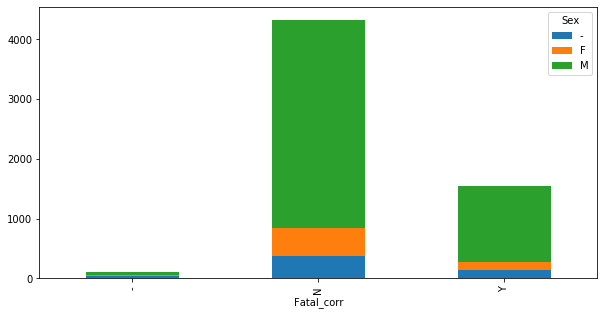

In [62]:
sh.groupby(['Fatal_corr','Sex']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()

Analizando href y href formula vemos que contienen el mismo dato en el 99% de los casos.

In [8]:

#sh[(sh['href formula'] == sh['href'])].count()/sh.count()

Las fechas contienen textos que podemos eliminar, y también podemos quitar de forma rápida algunos de los casos que provocan errores, como dobles guiones, o espacios al principio y final de las fechas. 

In [9]:
sh['fechas2'] = sh['Date'].str.replace('Reported','').str.replace('Early ','').str.replace('-- ','-')\
                .str.replace('Before ','').str.strip().str.strip('.').str.strip('-')

Una vez hecho esto le aplicamos una función de nuestra librería auxiliar que convierte la información a formato de fecha si los numeros que la forman se presentan segun una determinada estructura. Con esto salvamos aproximadamente el ~85% de las fechas del dataset:

In [10]:
sh['fecha_corregida'] = sh['fechas2'].apply(ti.paso_a_fecha)

En el campo de Edad (Age) tenemos valores dispares. Creamos una nueva columna que contenga únicamente los valores numéricos de esta. Además, cambiamos NaN por cero, valor que excluiremos de los análisis posteriores.

In [47]:
sh['Age2'] = sh.Age.str.extract('(\d+)')
sh['Age2'] = pd.to_numeric(sh['Age2'],errors='coerce').fillna(0).astype(np.int64)
sh['Age2'].unique()

array([16, 36, 43,  0, 60, 51, 50, 12,  9, 22, 25, 37, 20, 49, 15, 21, 40,
       72, 18, 29, 31, 11, 10, 59, 42, 34, 35, 19,  6, 27, 64, 23, 52, 13,
       57, 48, 39, 24, 26, 69, 46, 41, 45, 65, 38, 71, 32, 58, 28, 54, 44,
       14,  7, 62, 68, 47, 17, 30, 63, 70, 53, 33,  8, 61, 55, 66, 77, 74,
        3, 56,  5, 86, 84, 75, 73, 87, 67,  1,  2, 81, 78], dtype=int64)

Visualizamos en un histograma por edades los tramos de edad más propensos a ser atacados por tiburones, siendo los de 10-20 los más numerosos, seguido de cerca por los de entre 20 y 30 años.

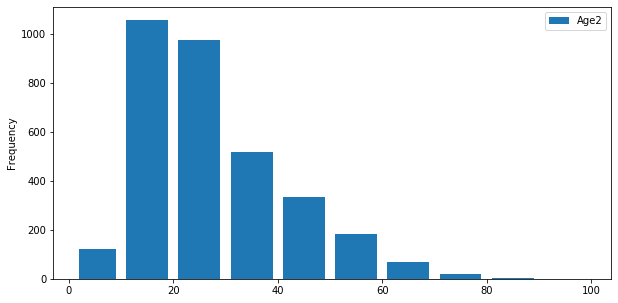

In [61]:

sh[['Age2']].plot(kind='hist',bins=[1,10,20,30,40,50,60,70,80,90,100],rwidth=0.8,figsize=(10,5))
plt.show()

In [10]:
sh['Species '].unique()

array([nan, '2 m shark', "3' to 4' shark", ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

Borramos ultimas 2 columnas por contener información irrelevante. Además, borramos las columnas que ya hemos sustituido por versiones corregidas de las mismas.

In [10]:
#sh['Unnamed: 22'].unique()
#sh['Unnamed: 23'].unique()
sh.drop(['Unnamed: 22','Unnamed: 23', 'Sex ', 'Fatal (Y/N)','Age','Date','fechas2'], axis=1)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Fatal_corr,Sex
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,16,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,N,M
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,36,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,N,M
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,43,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,N,M
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,NaN,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,N,M
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,NaN,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,N,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,Y,M
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,Y,M
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,Y,M
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,Y,M


Y exportamos el fichero limpio

In [16]:
export_csv = pd.DataFrame(sh)
export_csv.to_csv(r'../input/GSAF5.csv', index = None, header=True, encoding='latin1')

In [17]:
#pero no va